# Autoencoder Analysis
The goal is to be able to choose a random point in the latent space, pass this through the decoder, and obtain an image of a digit that looks real.There is 3 problem to do this:
<ul>
    <li>it’s not obvious how we should even go about choosing a random point in the latent space.</li>
    <li>the lack of diversity in the generated images. Ideally, we’d like to obtain a roughly equal spread of digits when sampling randomly from our latent space.But,8 need more space than 1</li>
    <li>existing large gaps between colors containing few points</li>
</ul>


## imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from models.AE import Autoencoder
from utils.loaders import load_mnist, load_model

In [2]:
# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])


## Load the data

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist()

## Load the model architecture

In [ ]:
AE = load_model(Autoencoder, RUN_FOLDER)

## reconstructing original paintings

When a new painting arrives at the exhibition, Mr. N. Coder chooses a point on the wall where he would like to place the marker to represent the artwork, as before.Suppose Mr.N coder has a daughter, Epsilon.She of course takes her father’s opinion into account, so she usually places the marker somewhere near the point that he suggests.Her job is to show the point to Mr.D coder.After training with these simple changes, Mr. N. Coder once again tries his strategy of placing markers on portions of the wall that are empty, so that Mr. D. Coder can regenerate these points as original artwork.But they have to make sure that they have generated images almost like the orginal one and also diverse images.Otherwise they may sell less ticket for the exibition.

In other words,the encoder will take each input image and encode it to two vectors, mu and log_var which together define a multivariate normal distribution in the latent space:

mu
The mean point of the distribution.

log_var
The logarithm of the variance of each dimension.

To encode an image into a specific point z in the latent space, we can sample from this distribution, using the following equation:

z = mu + sigma * epsilon
where

sigma = exp(log_var / 2)
epsilon is a point sampled from the standard normal distribution.

Relating this back to our story, mu represents Mr. N. Coder’s opinion of where the marker should appear on the wall. epsilon is his daughter’s random choice of how far away from mu the marker should be placed, scaled by sigma, Mr. N. Coder’s confidence in the marker’s position.

This means the encoder only needs to map each input to a mean vector and a variance vector and does not need to worry about covariance between dimensions.

Now, since we are sampling a random point from an area around mu, the decoder must ensure that all points in the same neighborhood produce very similar images when decoded, so that the reconstruction loss remains small. This is a very nice property that ensures that even when we choose a point in the latent space that has never been seen by the decoder, it is likely to decode to an image that is well formed.

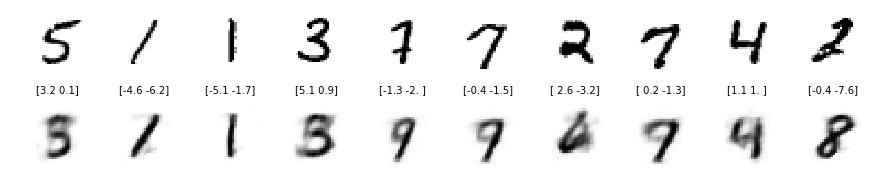

In [5]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
#Mr.N Coder job
z_points = AE.encoder.predict(example_images)
#Mr.D Coder Job(generate paintings like orginal)
reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')


## Mr N. Coder's wall

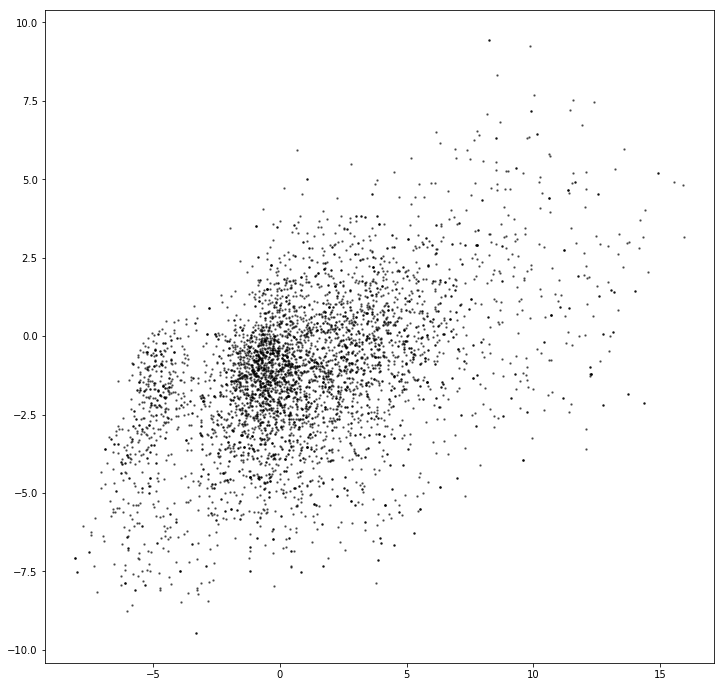

In [6]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

### The new generated art exhibition

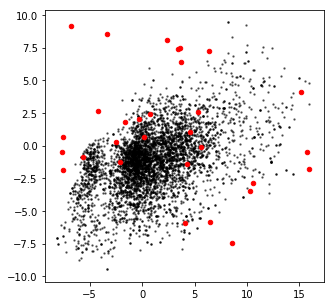

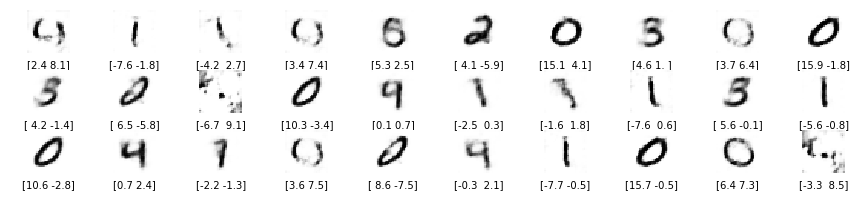

In [7]:
figsize = 5

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x,max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y,max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

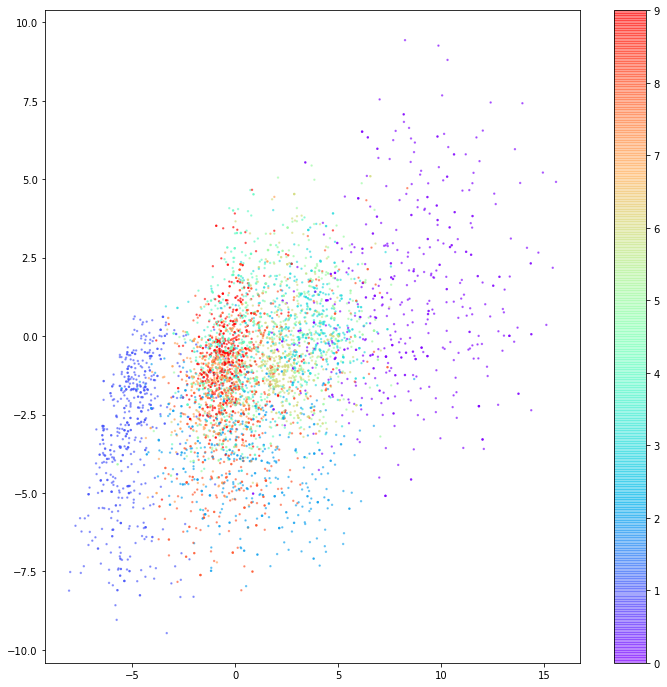

In [8]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.show()

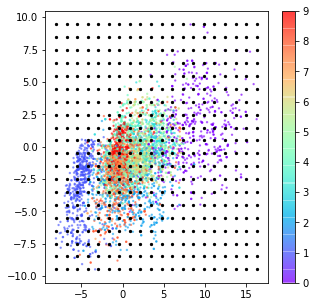

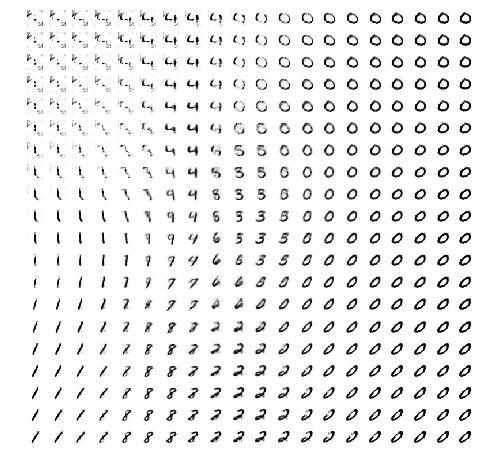

In [9]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)

#The constructed images that are in the space with no input are vague and also those are in the space with multiple colors(different numbers)
#As you can see the points in a specific color are clear


plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')